In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [701]:
G=6.67e-11
mT=5.9736e24
rT=6.3781e6
mL=0.07349e24
rL=1.7374e6
d=3.844e8
omega=2.6617e-6
Delta=G*mT/d**3
mu=mL/mT
vescape=11000

In [702]:
def r_(r,phi,t):
    return(1+r**2-2*r*np.cos(phi-omega*t))**.5
    

In [703]:
def r_dot(r,phi,pr,pphi,t):
    return pr

def phi_dot(r, phi, pr, p_phi, t):
    return p_phi/(r**2)

def pr_dot(r, phi, pr, p_phi, t):
    return p_phi**2/(r_(r,phi,t))**3-Delta*(1/r**2+mu/r**3*(r-np.cos(phi-omega*t)))

def pphi_dot(r,phi, pr, p_phi, t):
    return -Delta*mu*r/(r_(r,phi,t))**3*np.sin(phi-omega*t)



In [704]:

def GetRK4(f,r00,t):   
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    y1 = np.zeros(len(t))
    y2 = np.zeros(len(t))
    y3 = np.zeros(len(t))
    y4 = np.zeros(len(t))
    
    y1[0]= r00[0]
    y2[0]= r00[1]
    y3[0]= r00[2]
    y4[0]= r00[3]
    
    k1=np.zeros(4)
    k2=np.zeros(4)
    k3=np.zeros(4)
    k4=np.zeros(4)
    
    Npoints = len(t)
    for i in range(1,Npoints):
        
        for j in range(4):
            k1[j] = f[j](y1[i-1],y2[i-1],y3[i-1],y4[i-1],t[i-1])
        for j in range(4):
            k2[j] = f[j](y1[i-1]+0.5*k1[0],y2[i-1]+0.5*k1[1],y3[i-1]+0.5*k1[2],y4[i-1]+0.5*k1[3], t[i-1]+0.5*h)
        for j in range(4):
            k3[j] = f[j](y1[i-1]+0.5*k2[0],y2[i-1]+0.5*k2[1],y3[i-1]+0.5*k2[2],y4[i-1]+0.5*k2[3], t[i-1]+0.5*h)
        for j in range(4):
            k4[j] = f[j](y1[i-1]+0.5*k3[0],y2[i-1]+0.5*k3[1],y3[i-1]+0.5*k3[2],y4[i-1]+0.5*k3[3], t[i-1]+0.5*h)
            
        y1[i] = y1[i-1] + h*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
        y2[i] = y2[i-1] + h*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6
        y3[i] = y3[i-1] + h*(k1[2] + 2*k2[2] + 2*k3[2] + k4[2])/6
        y4[i] = y4[i-1] + h*(k1[3] + 2*k2[3] + 2*k3[3] + k4[3])/6
    
    return y1,y2,y3,y4


In [705]:
def RK4_paso(f, t, y, h):
    k1=f(t,y)
    k2=f(t+.5*h, y+ .5*k1*h)
    k3=f(t+.5*h, y+ .5*k2*h)
    k4=f(t+ h, y+ k3*h)
    return y + h*(k1+2*k2+2*k3+k4)/6

def RK4(f, y0, t0, tf, h):
    t=np.linspace(t0,tf,h)
    y= np.zeros((len(t),len(y0)))
    y[0]=y0
    for i in range(1,len(t)):
        y[i]=RK4_paso(f, t[i-1], y[i-1], h)
        
    return t,y
    
    

In [706]:


r0=rT/d
v0=vescape/d
theta0=5*np.pi/36
phi0=0
pr0 = v0*np.cos(theta0-phi0)
p_phi_0=r0*v0*np.sin(theta0-phi0)

y0=np.array([r0,phi0,pr0,p_phi_0])

t=np.linspace(0.,200000,1000)

In [707]:
f=[r_dot,phi_dot,pr_dot,pphi_dot]
y1, y2, y3, y4 = GetRK4(f,y0,t)

print(y1)

[0.01659235 0.02178395 0.02669884 0.03134524 0.03576955 0.04001211
 0.04410395 0.0480687  0.05192464 0.05568613 0.05936469 0.06296969
 0.06650889 0.06998877 0.07341486 0.07679183 0.08012377 0.08341421
 0.08666624 0.08988262 0.09306577 0.09621785 0.09934082 0.10243642
 0.10550626 0.10855176 0.11157424 0.11457491 0.11755486 0.12051511
 0.1234566  0.1263802  0.12928669 0.13217684 0.13505132 0.1379108
 0.14075588 0.14358711 0.14640504 0.14921016 0.15200294 0.15478382
 0.15755322 0.16031154 0.16305914 0.16579638 0.16852359 0.1712411
 0.17394919 0.17664816 0.17933829 0.18201982 0.18469302 0.18735811
 0.19001532 0.19266487 0.19530696 0.19794179 0.20056956 0.20319044
 0.20580461 0.20841223 0.21101348 0.21360849 0.21619742 0.21878041
 0.22135761 0.22392914 0.22649513 0.22905571 0.23161099 0.23416109
 0.23670612 0.23924619 0.2417814  0.24431186 0.24683765 0.24935888
 0.25187563 0.25438799 0.25689606 0.2593999  0.2618996  0.26439525
 0.26688691 0.26937465 0.27185856 0.2743387  0.27681513 0.279287

In [676]:

theta=np.linspace(5*np.pi/36,np.pi/2,N)
phi=np.linspace(0,np.pi/6,N)


[0.01659235 0.01685371 0.01711436 0.01737422 0.01763317 0.01789104
 0.01814762 0.01840271 0.01865607 0.01890748]


(-1.1, 1.1)

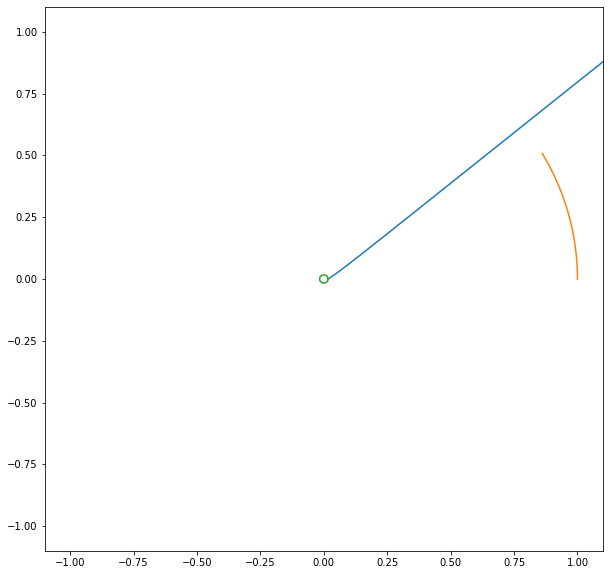

In [700]:
plt.figure(figsize=(10,10))


plt.plot(np.cos(y2)*y1,np.sin(y2)*y1)
plt.plot(np.cos(t*omega),np.sin(t*omega))
plt.plot(np.cos(np.linspace(0,2*np.pi))*r0,np.sin(np.linspace(0,2*np.pi))*r0)

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)

In [678]:

xL, yL =np.cos(omega*t), np.sin(t*omega)

In [665]:
def init():
    ax.set_xlim(-1., 1.)
    ax.set_ylim(-1., 1.)

    def animate(i):
        plot=ax.clear(
        init()
            
        Tierra=plt.Circle((0,0), r0, color='b', label='Tierra')
        Luna=plt.Circle((xL[i],yL[i]), rL/d, color='r', label='Luna')
            
        plot =ax.add_patch(Luna)
        plot = ax.add_patch(Tierra)
            
            
            
        

SyntaxError: invalid syntax (<ipython-input-665-587fb8646678>, line 9)